In [4]:

import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
#import autosklearn.regression
import time


In [351]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
df = pd.read_hdf('../database/merged_v3_datetime_selected_10min.hd5','table')
df = df.dropna()




In [6]:
df['Speed 1 (rpm)'].describe()

count    9574.000000
mean       73.313767
std        10.537952
min         0.000000
25%        72.000000
50%        74.400000
75%        77.000000
max        83.700000
Name: Speed 1 (rpm), dtype: float64

In [7]:
l1_ = len(df)
df = df[df['Speed 1 (rpm)'] > 50]
df = df[df['Speed 1 (rpm)'] < 100]# Filter out all points <50 and >100 rpm.
l2_ = len(df)
print('Number of datapoints filtered out: ', l1_-l2_, ' relative, ', (l1_-l2_)/l1_)

Number of datapoints filtered out:  199  relative,  0.020785460622519323


In [8]:
features_all = list(df)
for i in range(len(features_all)):
    print(i,features_all[i])
    
label = features_all[1] # Consumpt 1 is for the ME
test_features = [features_all[11],features_all[9],features_all[10],features_all[7],,features_all[0]] # Using Torque, Speed rpm
print('\nLabel: ', label)
print('Features: ', test_features)

0 Aux Power1 (kW)
1 Consump1 Rate (kg/h)
2 Consump2 Rate  (kg/h)
3 Eng1 Tot1 Mass (kg)
4 Eng1 Tot2 Mass (kg)
5 Eng2 Tot1 Mass (kg)
6 Eng2 Tot2 Mass (kg)
7 Gps Speed (kn)
8 Power1 (kW)
9 Speed 1 (rpm)
10 SpeedlogSpeed (kn)
11 Torque 1 (kNm)

Label:  Consump1 Rate (kg/h)
Features:  ['Torque 1 (kNm)', 'Speed 1 (rpm)']


In [9]:
# Create new dataframe for training

df2 = pd.DataFrame()

for n_ in test_features:
    df2[n_] = df[n_]

df2[label] = df[label]

train_dataset = df2.sample(frac=0.8,random_state=42)
test_dataset = df2.drop(train_dataset.index)


In [10]:
# Explain the data

from interpret import show
from interpret.data import Marginal

marginal = Marginal().explain_data(train_dataset[test_features], train_dataset[label], name = 'Train Data')
show(marginal)

Linear R2 train: 0.8868597720483011
Mean absolute percentage error RF 4.3033317676551714 %


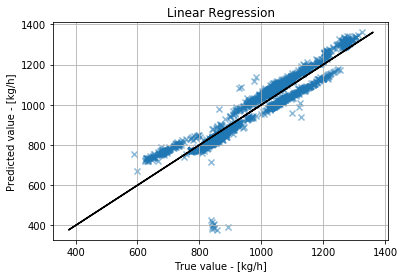

In [362]:
cores = -1


m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(train_dataset[test_features], train_dataset[label])

R2_train = r2_score(m_linear.predict(test_dataset[test_features]),test_dataset[label])
print('Linear R2 train:', R2_train)


error = mean_absolute_percentage_error(test_dataset[label],m_linear.predict(test_dataset[test_features]))
print('Mean absolute percentage error RF', error,'%')

plt.scatter(m_linear.predict(test_dataset[test_features]),test_dataset[label],marker='x',alpha=0.5)
plt.plot(test_dataset[label],test_dataset[label],color='black')
plt.title('Linear Regression')
plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.savefig('linear_regr.ps')

/anaconda3/envs/tpot/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



R2 train SVR: 0.7902430911998076
Mean absolute percentage error RF 4.690427206191652 %


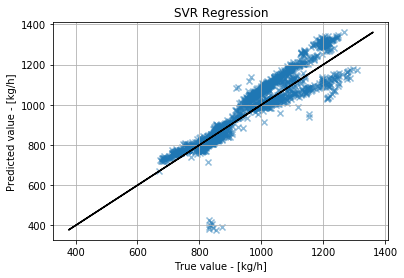

In [363]:

m_svr = sk.svm.LinearSVR()
m_svr.fit(train_dataset[test_features], train_dataset[label])

R2_train = r2_score(m_svr.predict(test_dataset[test_features]), test_dataset[label])
print('R2 train SVR:', R2_train)

error = mean_absolute_percentage_error(test_dataset[label],m_svr.predict(test_dataset[test_features]))
print('Mean absolute percentage error SVR', error,'%')

plt.scatter(m_svr.predict(test_dataset[test_features]),test_dataset[label],marker='x',alpha=0.5)
plt.plot(test_dataset[label],test_dataset[label],color='black')
plt.title('SVR Regression')

plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.savefig('svr_regr.ps')


R2 train Ridge: 0.7902430911998076
Mean absolute percentage error Ridge 4.30333130014742 %


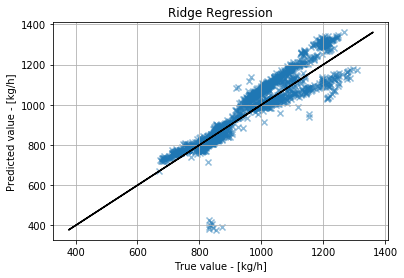

In [370]:
###sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, 
#normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, 
#random_state=None)[source]¶

m_ridge = sk.linear_model.Ridge()
m_ridge.fit(train_dataset[test_features], train_dataset[label])

R2_train = r2_score(m_svr.predict(test_dataset[test_features]), test_dataset[label])
print('R2 train Ridge:', R2_train)

error = mean_absolute_percentage_error(test_dataset[label],m_ridge.predict(test_dataset[test_features]))
print('Mean absolute percentage error Ridge', error,'%')

plt.scatter(m_svr.predict(test_dataset[test_features]),test_dataset[label],marker='x',alpha=0.5)
plt.plot(test_dataset[label],test_dataset[label],color='black')
plt.title('Ridge Regression')

plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.savefig('ridge_regr.ps')

In [415]:
###sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, 
#normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, 
#random_state=None)[source]¶

X_train = train_dataset[test_features]
y_train = train_dataset[label]
#X_test = [[1,3],[2,5]]    

p = np.polyfit(train_dataset[label],train_dataset[test_features],2)

print(p)


[[ 1.62686986e-04  1.36629790e-05]
 [ 8.32884990e-02 -6.10212279e-03]
 [ 3.56077068e+02  6.73711275e+01]]


In [417]:
x = np.array(train_dataset[test_features])[10]
print(x)

pred = x[0]**2 * p[0] * p[1] + p[1] + p[2]
print(pred)

[646.7  78.2]
[361.82723025  67.33015701]


In [ ]:


R2_train = r2_score(m_poly.predict(test_dataset[test_features]), test_dataset[label])
print('R2 Poly :', R2_train)

error = mean_absolute_percentage_error(test_dataset[label],m_poly.predict(test_dataset[test_features]))
print('Mean absolute percentage error Ridge', error,'%')

plt.scatter(m_poly.predict(test_dataset[test_features]),test_dataset[label],marker='x',alpha=0.5)
plt.plot(test_dataset[label],test_dataset[label],color='black')
plt.title('Poly Regression')

plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.savefig('Poly_regr.ps')

R2 train random forest: 0.9344194917807315
Mean absolute percentage error RF 2.1494159479964914 %


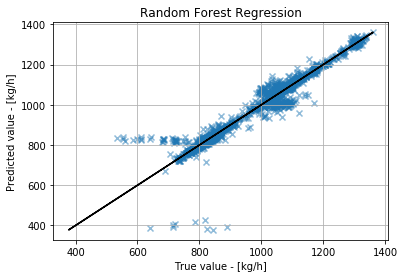

In [364]:

from sklearn.ensemble import RandomForestRegressor
m_rf = RandomForestRegressor(max_depth=50, random_state=42,n_estimators=300)

m_rf.fit(train_dataset[test_features], train_dataset[label])

R2_train = r2_score(m_rf.predict(test_dataset[test_features]),test_dataset[label])
print('R2 train random forest:', R2_train)

error = mean_absolute_percentage_error(test_dataset[label],m_rf.predict(test_dataset[test_features]))
print('Mean absolute percentage error RF', error,'%')

plt.scatter(m_rf.predict(test_dataset[test_features]),test_dataset[label],marker='x',alpha=0.5)
plt.plot(test_dataset[label],test_dataset[label],color='black')
plt.title('Random Forest Regression')

plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.savefig('RF_regr.ps')


/anaconda3/envs/tpot/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



R2 train NN: 0.9344194917807315
Mean absolute percentage error NN 4.241979609825685 %


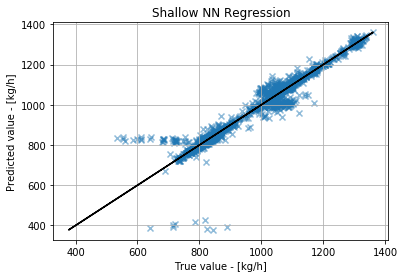

In [368]:
## Shallow NN

###sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’,
##solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001,
###power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False,
##momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
##epsilon=1e-08, n_iter_no_change=10)[source]¶

from sklearn.neural_network import MLPRegressor
m_NN = MLPRegressor(hidden_layer_sizes=100, activation='relu',alpha=0.0001)
m_NN.fit(train_dataset[test_features], train_dataset[label])

R2_train = r2_score(m_rf.predict(test_dataset[test_features]),test_dataset[label])
print('R2 train NN:', R2_train)

error = mean_absolute_percentage_error(test_dataset[label],m_NN.predict(test_dataset[test_features]))
print('Mean absolute percentage error NN', error,'%')

plt.scatter(m_rf.predict(test_dataset[test_features]),test_dataset[label],marker='x',alpha=0.5)
plt.plot(test_dataset[label],test_dataset[label],color='black')
plt.title('Shallow NN Regression')

plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.savefig('shallow_NN_regr.ps')


In [16]:
from tpot import TPOTRegressor
m_tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, n_jobs=cores, scoring='r2')

m_tpot.fit(train_dataset[test_features], train_dataset[label])


Generation 1 - Current best internal CV score: 0.941921552840669
Generation 2 - Current best internal CV score: 0.941921552840669
Generation 3 - Current best internal CV score: 0.941921552840669
Generation 4 - Current best internal CV score: 0.941921552840669
Generation 5 - Current best internal CV score: 0.941921552840669
Generation 6 - Current best internal CV score: 0.941921552840669
Generation 7 - Current best internal CV score: 0.94213036283743
Generation 8 - Current best internal CV score: 0.94213036283743
Generation 9 - Current best internal CV score: 0.94213036283743
Generation 10 - Current best internal CV score: 0.94213036283743

Best pipeline: ElasticNetCV(GradientBoostingRegressor(ZeroCount(input_matrix), alpha=0.99, learning_rate=0.01, loss=ls, max_depth=10, max_features=0.7000000000000001, min_samples_leaf=13, min_samples_split=9, n_estimators=100, subsample=1.0), l1_ratio=0.9500000000000001, tol=0.01)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=10,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=-1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=None, scoring='r2', subsample=1.0,
              template='RandomTree', use_dask=False, verbosity=2,
              warm_start=False)

Mean absolute percentage error 2.1039443979167385 %
R2 train TPOT: 0.9446681107944581


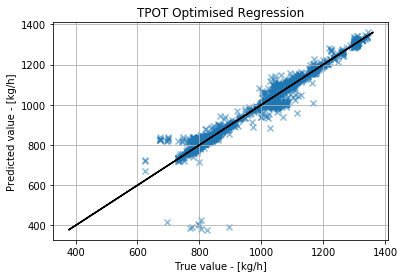

In [365]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error = mean_absolute_percentage_error(test_dataset[label],m_tpot.predict(test_dataset[test_features]))
print('Mean absolute percentage error', error,'%')

R2_train = r2_score(m_tpot.predict(test_dataset[test_features]),test_dataset[label])
print('R2 train TPOT:', R2_train)

plt.scatter(m_tpot.predict(test_dataset[test_features]),test_dataset[label],marker='x',alpha=0.5)
plt.plot(test_dataset[label],test_dataset[label],color='black')
plt.title('TPOT Optimised Regression')

plt.grid()

plt.xlabel('True value - [kg/h]')
plt.ylabel('Predicted value - [kg/h]')
plt.savefig('TPOT_regr.ps')

In [153]:
m_tpot.export('tpot_best_pipeline.py') # export the best pipeline among the population

In [124]:
%matplotlib inline

In [341]:
no_ = 300
X = np.linspace(65,85,no_)
#print(X)
Y = np.linspace(450,750,no_)


#z = np.array([[0,0,0]])

z = np.empty([0,3])

for n_ in range(no_):   
    for i in range(no_):
        z = np.append(z, [ [X[n_],Y[i],float(m_tpot.predict( [[Y[n_],X[i]]] ) ) ]],axis=0)


In [342]:
m_tpot.predict(z[:,1:])

array([ 956.28861696,  956.28861696,  956.28861696, ..., 1346.30223795,
       1346.30223795, 1346.30223795])

In [346]:
from mpl_toolkits import mplot3d
%matplotlib inline

X = z[:,0]
Y = z[:,1]
Z = z[:,2]

/anaconda3/envs/tpot/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:328: MatplotlibDeprecationWarning:

The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.

/anaconda3/envs/tpot/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:663: MatplotlibDeprecationWarning:

matplotlib.verbose is deprecated;
Command line argument --verbose-LEVEL is deprecated.
This functionality is now provided by the standard
python logging library.  To get more (or less) logging output:
    import logging
    logger = logging.getLogger('matplotlib')
    logger.set_level(logging.INFO)

/anaconda3/envs/tpot/lib/python3.6/site-packages/matplotlib/__init__.py:350: MatplotlibDeprecationWarning:

matplotlib.verbose is deprecated;
Command line argument --verbose-LEVEL is deprecated.
This functionality is now provided by the standard
python logging library.  To get more (or less) logging output:
    import logging
    logger = loggi

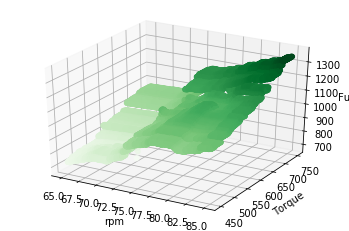

In [350]:


fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.scatter3D(X, Y, Z, c=Z, cmap='Greens');


ax.set_xlabel('rpm')
ax.set_ylabel('Torque')
ax.set_zlabel('Fuel')
plt.savefig('blabla.pdf')

In [345]:
z[50:150]

array([[ 65.        , 500.16722408, 753.15578983],
       [ 65.        , 501.17056856, 752.59970696],
       [ 65.        , 502.17391304, 752.59970696],
       [ 65.        , 503.17725753, 752.59970696],
       [ 65.        , 504.18060201, 752.59970696],
       [ 65.        , 505.18394649, 752.59970696],
       [ 65.        , 506.18729097, 752.59970696],
       [ 65.        , 507.19063545, 752.59970696],
       [ 65.        , 508.19397993, 760.07431498],
       [ 65.        , 509.19732441, 760.07431498],
       [ 65.        , 510.2006689 , 760.07431498],
       [ 65.        , 511.20401338, 758.36048041],
       [ 65.        , 512.20735786, 758.36048041],
       [ 65.        , 513.21070234, 758.36048041],
       [ 65.        , 514.21404682, 758.36048041],
       [ 65.        , 515.2173913 , 758.36048041],
       [ 65.        , 516.22073579, 758.36048041],
       [ 65.        , 517.22408027, 758.36048041],
       [ 65.        , 518.22742475, 758.36048041],
       [ 65.        , 519.23076

In [141]:
df3 = pd.DataFrame()
df3['data'] = z
df3.to_excel('output_300.xlsx')

In [179]:
np.zeros((300,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [178]:
m_tpot.predict(np.zeros((2,2)))

array([625.80883873, 625.80883873])

In [120]:
plt.scatter(m_tpot.predict([X,Y]),m_tpot.predict[X,Y])

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 102 

In [57]:
m_tpot.predict( (np.array(test_dataset[test_features] )))

array([1080.97021236, 1115.64029044, 1088.03652418, ..., 1132.31356387,
       1137.58083254, 1069.23401581])

In [80]:
np.array(test_dataset[test_features] )[0]

array([673.9,  76.6])

In [84]:
m_linear.predict(np.array([1,1]).reshape(-1,))

ValueError: Expected 2D array, got 1D array instead:
array=[1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [62]:
from interpret import show
from interpret.perf import RegressionPerf
from interpret.blackbox import MorrisSensitivity
from interpret.blackbox import PartialDependence


#Model to use..

blackbox_model = m_rf

X_test = np.array(test_dataset[test_features])
y_test = np.array(test_dataset[label])
X_train = np.array(train_dataset[test_features])
y_train = np.array(train_dataset[label])


blackbox_perf = RegressionPerf(blackbox_model.predict).explain_perf(X_test, y_test, name='RF model')

#

sensitivity = MorrisSensitivity(predict_fn=blackbox_model.predict, data=X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")


pdp = PartialDependence(predict_fn=blackbox_model.predict, data=X_train)
pdp_global = pdp.explain_global(name='Partial Dependence')

show([blackbox_perf, sensitivity_global, pdp_global])

Open in new window

In [57]:

#Model to use..

blackbox_model = m_svr

X_test = np.array(test_dataset[test_features])
y_test = np.array(test_dataset[label])
X_train = np.array(train_dataset[test_features])
y_train = np.array(train_dataset[label])

blackbox_perf = RegressionPerf(blackbox_model.predict).explain_perf(X_test, y_test, name='SVR model')

#

sensitivity = MorrisSensitivity(predict_fn=blackbox_model.predict, data=X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")


pdp = PartialDependence(predict_fn=blackbox_model.predict, data=X_train)
pdp_global = pdp.explain_global(name='Partial Dependence')

show([blackbox_perf, sensitivity_global, pdp_global])

Open in new window

In [121]:
cores = -1 # use all cores

m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(m_linear.predict(X_test),y_test)
print('Linear R2 train:', R2_train)

m_svr = sk.svm.LinearSVR()
m_svr.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(m_svr.predict(X_test),y_test)
print('R2 train SVR:', R2_train)


Linear R2 train: 0.8660798079158204
R2 train SVR: 0.7892493007525465


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [122]:
from sklearn.ensemble import RandomForestRegressor
randfor_regr = RandomForestRegressor(max_depth=40, random_state=42,n_estimators=200)

randfor_regr.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(randfor_regr.predict(X_test),y_test)
print('R2 train random forest:', R2_train)


R2 train random forest: 0.9346609336997542


Text(0.5, 1.0, 'Support vector Regr')

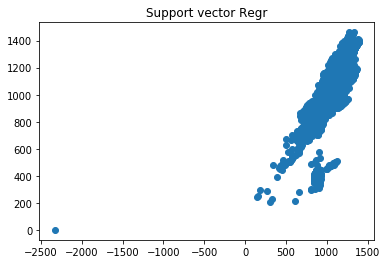

In [123]:
plt.scatter(m_svr.predict(X),y)
plt.title('Support vector Regr')
##



Text(0.5, 1.0, 'Linear Regr')

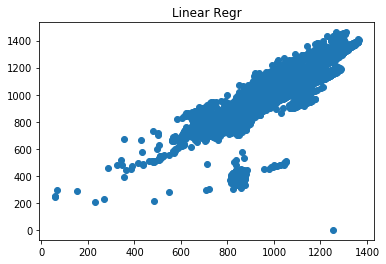

In [124]:
plt.scatter(m_linear.predict(X),y)
plt.title('Linear Regr')



Text(0.5, 1.0, 'Random forest Regr')

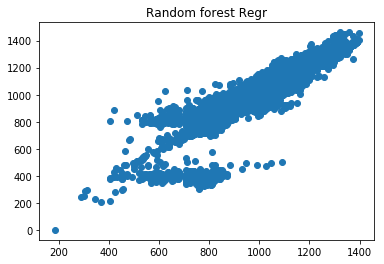

In [125]:
plt.scatter(randfor_regr.predict(X),y)
plt.title('Random forest Regr')


In [23]:
# Seems like the predictions are going 

m_svr.predict(X).min()

-3147.6441510902896